In [28]:
import sys
sys.path.append('../src')

import generate_general_networks as generate
import torch
import loading_json as load
import json
import numpy as np
from tqdm import tqdm
import contextlib
import matplotlib.pyplot as plt
import compare_different_grids as compare
import tikzplotlib

In [2]:
# Creating results
density_list = []
N_list = []
for N in tqdm(N_list):
    print(f"N = {N}")
    with contextlib.redirect_stdout(None):
        print("Creating the network and solving the conservation law")
        network = generate.compare_grid_size_network(T = 100, N = N, scheme = 3)
        densities, queues, _, _ = network.solve_cons_law()
        times = list(densities[0].keys())
        print(np.min(np.array(times)), np.max(np.array(times)))
        print(f"Writing to json file")
        # Write to json file:
        densities_loaded = load.convert_from_tensor(densities)
        queues_loaded = load.convert_from_tensor(queues)

        with open(f"../results/comparing_grids_N={N}.json", 'w') as fd:
            fd.write(json.dumps([densities_loaded, queues_loaded]))
    print()

0it [00:00, ?it/s]


In [29]:
N_list = [2, 8, 20, 44, 92, 188]
dx_list = []
for N in N_list:    
    network = generate.compare_grid_size_network(T = 100, N = N, scheme = 3, track_grad=False)
    dx_list.append(network.roads[0].dx)

In [32]:
# Calculating l1 errors:
files = ["../results/comparing_grids_N=2.json", "../results/comparing_grids_N=8.json",
         "../results/comparing_grids_N=20.json", "../results/comparing_grids_N=44.json"]
final_file = "../results/comparing_grids_N=188.json"
#l1_errors = compare.compare_grids(files, final_file, dx_list[-1])
l1_errors = [torch.tensor(0.6108), torch.tensor(0.3066), torch.tensor(0.1420), torch.tensor(0.0625)]

In [30]:
print(l1_errors)

[tensor(0.6108), tensor(0.3066), tensor(0.1420), tensor(0.0625)]


In [11]:
dx_list

[tensor(0.1667),
 tensor(0.0833),
 tensor(0.0417),
 tensor(0.0208),
 tensor(0.0104),
 tensor(0.0052)]

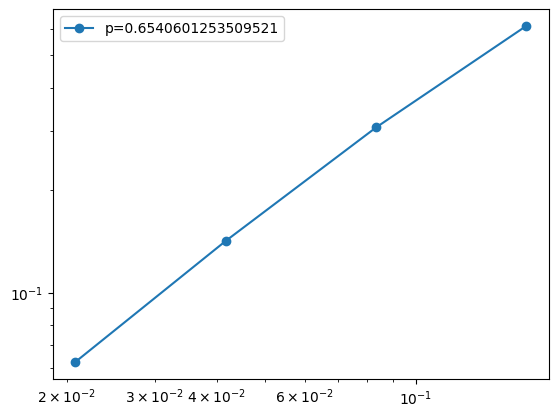

In [33]:
plt.loglog([dx_list[i] for i in range(4)], l1_errors, '-o', label=f"p={np.log(l1_errors[2] - l1_errors[3]) / np.log(dx_list[2] - dx_list[3])}")
plt.legend()
# tikzplotlib.save("../figurer/convergence_medium.tex")